# Tache 1.2

## Modèles de Embeddings

- L'idée est de chercher les mots proches sémantiquement des termes primaires ou secondaires que nous avons déjà en utilisant les embeddings de ces termes.  
- On peut faire cela avec plusieurs embedders, qui ont également utile pour une extension sémantique par exemple :  Word2Vec, BERT, Glove...

### fasttext

pip install fasttext==0.9.3

wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz

gunzip cc.fr.300.bin.gz

In [ ]:
import fasttext

modelFastext = fasttext.load_model("/teamspace/studios/this_studio/cc.fr.300.bin") 

keywords = ["Vie en autarcie", "Autosuffisance", "Fermentation","Poêle de masse"]

for keyword in keywords:
    similar_words = modelFastext.get_nearest_neighbors(keyword, k=3)
    print(f"Expansions pour '{keyword}': {similar_words} \n")

Expansions pour 'Vie en autarcie': [(0.6295375227928162, 'quasi-autarcie'), (0.5857999920845032, 'Autarcie'), (0.5106639266014099, 'aiutarci')] 

Expansions pour 'Autosuffisance': [(0.6425352096557617, 'autosuffisance'), (0.6188276410102844, 'Auto-suffisance'), (0.5622236728668213, 'auto-suffisance')] 

Expansions pour 'Fermentation': [(0.6766241788864136, 'fermentation'), (0.6169770956039429, 'Fermentations'), (0.5800446271896362, 'fermentations')] 

Expansions pour 'Poêle de masse': [(0.5726413130760193, 'Poêlerie'), (0.5305557250976562, 'Plebs.3x08.FR.FBK.zipRelease'), (0.5272475481033325, 'policeAlcalaAmiralBerettaBlooCaporalColonelLeBeauneLeChaufferieLeFrançoisMaaxMaaxMonoMaaxRoundedNorrPlaakRobinAlcala')] 



### Word2Vec

pip install gensim==4.3.3

#### Google News model

In [ ]:
import gensim.downloader as api

modelGoogleNews = api.load("word2vec-google-news-300") 
similar_words = modelGoogleNews.most_similar("fermentation", topn=3)
print(f"Similar words to 'fermentation': {similar_words}")

Similar words to 'fermentation': [('secondary_fermentation', 0.7000930905342102), ('yeast', 0.6928147077560425), ('malolactic_fermentation', 0.6912585496902466)]


#### French Model

In [ ]:
from gensim.models import KeyedVectors

model_path = '/teamspace/studios/this_studio/frWac.bin'
modelFrench = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors="ignore")

mots = [
    "potager", "filtre berkey", "permaculture", "filtre doulton", "poêle à bois bouilleur", 
    "poêle de masse", "cuve eau pluie", "maison terre-paille", "maison torchis", "ferme en pierre",
    "maraîchage", "culture lasagnes", "aquaponie", "agroforesterie", "forage manuel", 
    "puits artésien", "filtration naturelle", "biogaz maison", "kerterre", "fermentation", "fumage",
    "autosuffisance", "autonomie alimentaire", "autonomie énergétique", "autonomie en eau", 
    "vie en autarcie", "habitats autonomes"
]


mots_present = 0
mots_absent = 0
mots_similaires = []

for mot in mots:
    if mot in modelFrench:
        mots_present += 1
        similar_words = modelFrench.most_similar(mot, topn=3)
        mots_similaires.append((mot, similar_words))
    else:
        mots_absent += 1

pourcentage_absents = (mots_absent / len(mots)) * 100

for mot, similar_words in mots_similaires:
    print(f"\nMots similaires à '{mot}':")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity}")


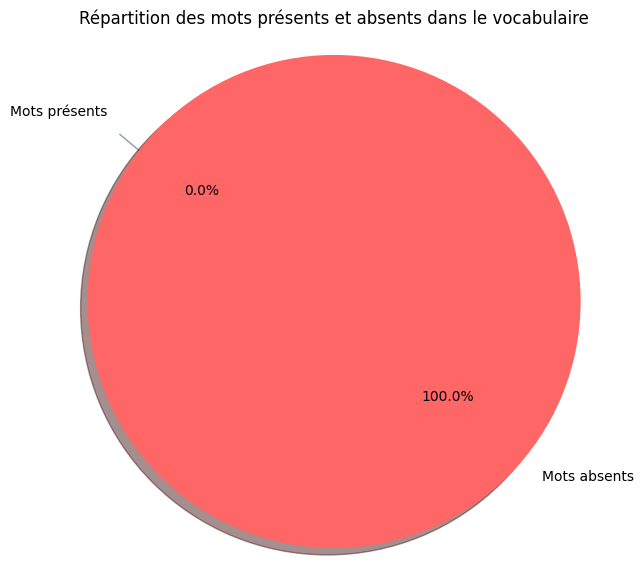

In [ ]:
import matplotlib.pyplot as plt

labels = ['Mots présents', 'Mots absents']
sizes = [mots_present, mots_absent]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Répartition des mots présents et absents dans le vocabulaire')
plt.show()

# Tache 1.4

In [2]:
import json 

with open("../jsons/videos.json", "r", encoding="utf-8") as file:
    videos = json.load(file)
    print(len(videos))

6866


In [3]:
import random

echantillon = random.sample(videos, min(1000, len(videos)))
with open("../jsons/echantillon.json", "w", encoding="utf-8") as f:
    json.dump(echantillon, f, ensure_ascii=False, indent=2)

## Plots 

In [20]:
import json
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

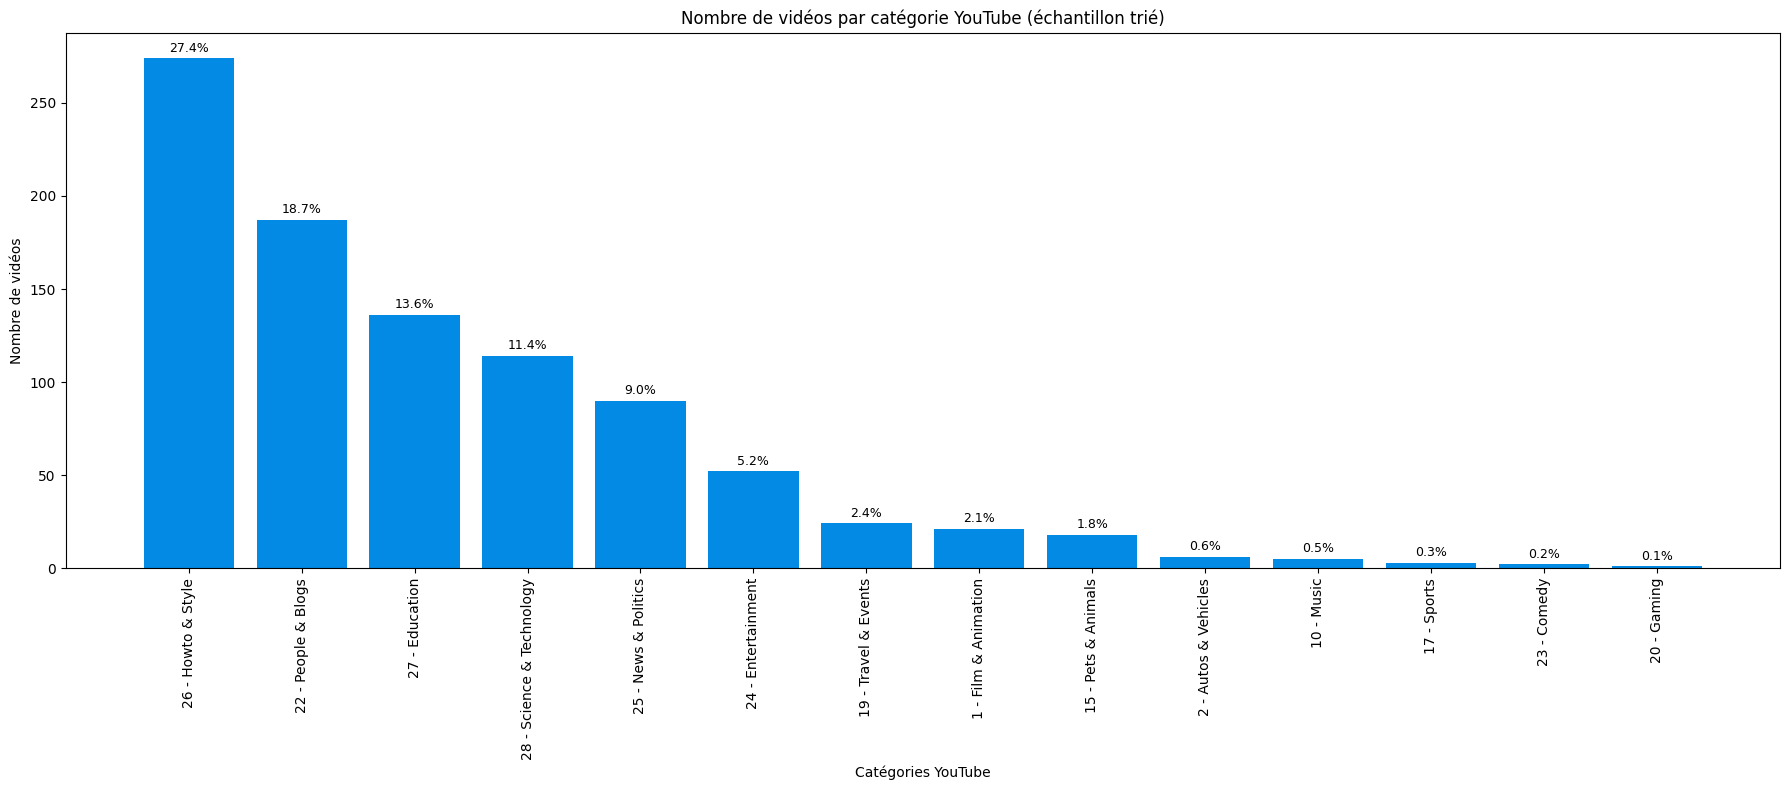

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

categorie_labels = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals", 17: "Sports",
    18: "Short Movies", 19: "Travel & Events", 20: "Gaming", 21: "Videoblogging", 22: "People & Blogs",
    23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure", 33: "Classics",
    34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign", 39: "Horror",
    40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Shorts", 43: "Shows", 44: "Trailers"
}

compteur_categories = {i: 0 for i in categorie_labels.keys()}

for video in echantillon:
    cat = video.get("youtubeCategorie")
    if cat and cat.isdigit():
        cat_id = int(cat)
        if cat_id in compteur_categories:
            compteur_categories[cat_id] += 1

# Filtrage des catégories avec au moins 1 vidéo
filtre = [(i, compteur_categories[i]) for i in compteur_categories if compteur_categories[i] > 0]

# Calcul des pourcentages et tri décroissant
total = sum(freq for _, freq in filtre)
trié = sorted(filtre, key=lambda x: x[1], reverse=True)
labels = [f"{i} - {categorie_labels[i]}" for i, _ in trié]
frequences = [freq for _, freq in trié]

plt.figure(figsize=(18, 8))
bars = plt.bar(labels, frequences, color="#028ae4")
plt.xlabel("Catégories YouTube")
plt.ylabel("Nombre de vidéos")
plt.title("Nombre de vidéos par catégorie YouTube (échantillon trié)")
plt.xticks(rotation=90)

for bar, freq in zip(bars, frequences):
    pourcentage = (freq/1000)*100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{pourcentage:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


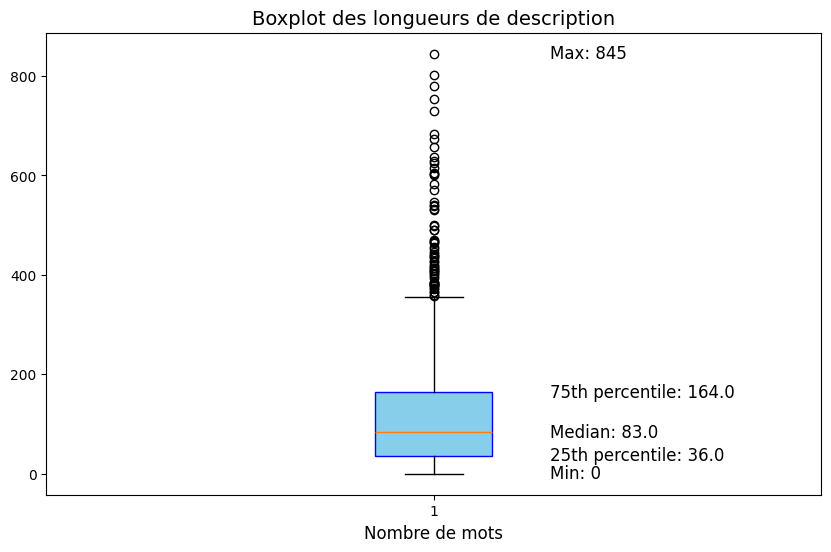

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def word_count(description):
    return len(description.split())

word_counts = [word_count(video['description']) for video in echantillon]

quartiles = np.percentile(word_counts, [25, 50, 75])
min_value = np.min(word_counts)
max_value = np.max(word_counts)

plt.figure(figsize=(10, 6))
plt.boxplot(word_counts, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))

plt.xlabel('Nombre de mots', fontsize=12)
plt.title('Boxplot des longueurs de description', fontsize=14)

plt.text(1.15, min_value, f"Min: {min_value}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[0], f"25th percentile: {quartiles[0]}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[1], f"Median: {quartiles[1]}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[2], f"75th percentile: {quartiles[2]}", fontsize=12, verticalalignment='center')
plt.text(1.15, max_value, f"Max: {max_value}", fontsize=12, verticalalignment='center')

plt.show()


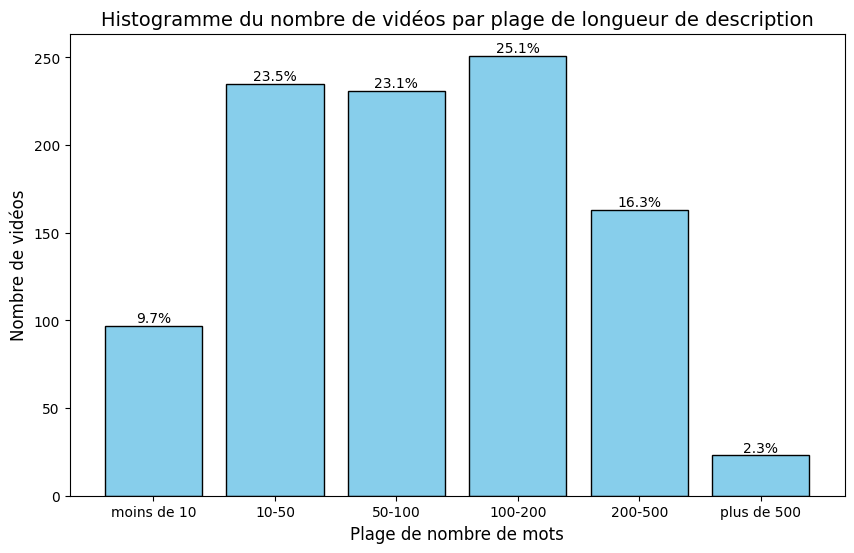

In [32]:
import json
import matplotlib.pyplot as plt

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Fonction pour calculer le nombre de mots dans la description
def word_count(description):
    return len(description.split())

# Obtenir le nombre de mots pour chaque description
word_counts = [word_count(video['description']) for video in echantillon]

# Définir les intervalles et initialiser un dictionnaire pour compter les vidéos dans chaque intervalle
intervals = {
    'moins de 10': 0,
    '10-50': 0,
    '50-100': 0,
    '100-200': 0,
    '200-500': 0,
    'plus de 500': 0
}

# Remplir le dictionnaire avec les comptages pour chaque intervalle
for word_count_value in word_counts:
    if word_count_value < 10:
        intervals['moins de 10'] += 1
    elif 10 <= word_count_value < 50:
        intervals['10-50'] += 1
    elif 50 <= word_count_value < 100:
        intervals['50-100'] += 1
    elif 100 <= word_count_value < 200:
        intervals['100-200'] += 1
    elif 200 <= word_count_value < 500:
        intervals['200-500'] += 1
    else:
        intervals['plus de 500'] += 1

# Calculer le nombre total de vidéos
total_videos = sum(intervals.values())

# Créer l'histogramme à partir du dictionnaire
plt.figure(figsize=(10, 6))
bars = plt.bar(intervals.keys(), intervals.values(), color='skyblue', edgecolor='black')

# Ajouter les labels et le titre
plt.xlabel('Plage de nombre de mots', fontsize=12)
plt.ylabel('Nombre de vidéos', fontsize=12)
plt.title('Histogramme du nombre de vidéos par plage de longueur de description', fontsize=14)

# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_videos) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

# Afficher l'histogramme
plt.show()


In [43]:
import json
import pandas as pd

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Charger les noms des chaînes depuis le fichier JSON sauvegardé
with open("../jsons/channel_names.json", "r", encoding="utf-8") as f:
    channel_names = json.load(f)

# Comptabiliser le nombre de vidéos par chaîne
video_count_per_channel = {}
for video in echantillon:
    channel_id = video['id_chaine']
    video_count_per_channel[channel_id] = video_count_per_channel.get(channel_id, 0) + 1

# Remplacer les IDs de chaînes par leurs noms
channel_video_counts = {channel_names.get(channel_id, "Nom non trouvé"): count for channel_id, count in video_count_per_channel.items()}

# Convertir en DataFrame pour un affichage sous forme de table
df_channel_video_counts = pd.DataFrame(list(channel_video_counts.items()), columns=["Nom de la chaîne", "Nombre de vidéos"])

# Trier les données par nombre de vidéos (en ordre décroissant)
df_channel_video_counts = df_channel_video_counts.sort_values(by="Nombre de vidéos", ascending=False)

# Sauvegarder la table dans un fichier Excel (sans l'argument 'encoding')
df_channel_video_counts.to_excel("../xls/channel_video_counts.xlsx", index=False)

print("Le fichier Excel a été sauvegardé sous 'channel_video_counts.xlsx'")


Le fichier Excel a été sauvegardé sous 'channel_video_counts.xlsx'


In [50]:
import json
import pandas as pd
import re

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Fonction pour convertir la durée en minutes
def parse_duration(duration):
    pattern = r"PT(\d+H)?(\d+M)?(\d+S)?"
    match = re.match(pattern, duration)
    
    hours = int(match.group(1)[:-1]) if match.group(1) else 0
    minutes = int(match.group(2)[:-1]) if match.group(2) else 0
    seconds = int(match.group(3)[:-1]) if match.group(3) else 0
    
    # Conversion totale en minutes
    return (hours * 60) + minutes + (seconds / 60)

# Ajouter une colonne pour la durée en minutes dans les données
for video in echantillon:
    video['duree_minutes'] = parse_duration(video['duree'])

# Créer un DataFrame à partir des données
df = pd.DataFrame(echantillon)

# Obtenir un résumé statistique des durées des vidéos en minutes
stats = df['duree_minutes'].describe()

# Convertir les statistiques en DataFrame avec les en-têtes horizontaux
stats_df = stats.to_frame().T  # `.T` pour transposer les statistiques en ligne

# Sauvegarder les statistiques dans un fichier Excel
output_file = "../xls/statistiques_videos.xlsx"
stats_df.to_excel(output_file, index=False)

print(f"Les statistiques ont été enregistrées dans {output_file}")


Les statistiques ont été enregistrées dans ../xls/statistiques_videos.xlsx


C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1126021683.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percent_by_range[index]


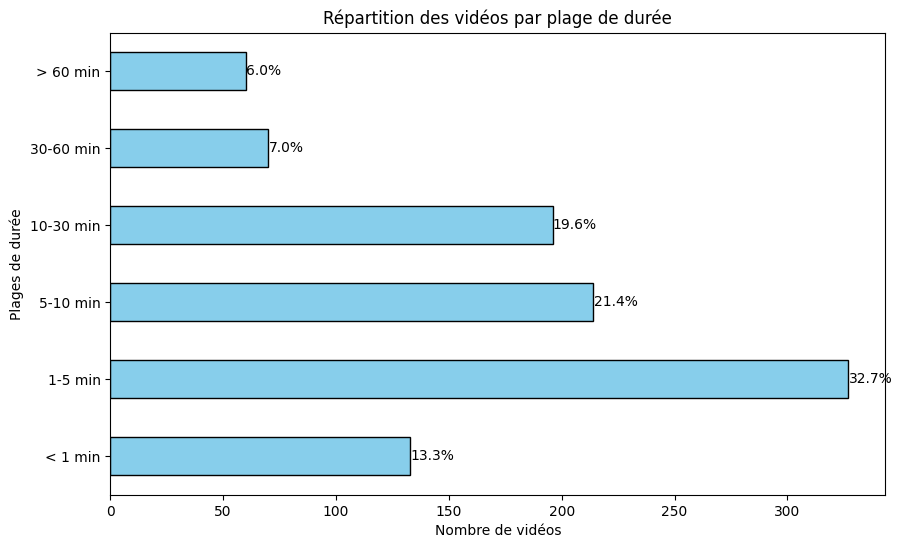

In [53]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Fonction pour convertir la durée en minutes
def parse_duration(duration):
    pattern = r"PT(\d+H)?(\d+M)?(\d+S)?"
    match = re.match(pattern, duration)
    
    hours = int(match.group(1)[:-1]) if match.group(1) else 0
    minutes = int(match.group(2)[:-1]) if match.group(2) else 0
    seconds = int(match.group(3)[:-1]) if match.group(3) else 0
    
    # Conversion totale en minutes
    return (hours * 60) + minutes + (seconds / 60)

# Ajouter une colonne pour la durée en minutes dans les données
for video in echantillon:
    video['duree_minutes'] = parse_duration(video['duree'])

# Créer un DataFrame à partir des données
df = pd.DataFrame(echantillon)

# Définir les plages de durées
bins = [0, 1, 5, 10, 30, 60, float('inf')]
labels = ['< 1 min', '1-5 min', '5-10 min', '10-30 min', '30-60 min', '> 60 min']

# Créer une nouvelle colonne pour les plages de durée
df['plage_duree'] = pd.cut(df['duree_minutes'], bins=bins, labels=labels, right=False)

# Compter le nombre de vidéos dans chaque plage de durée
count_by_range = df['plage_duree'].value_counts().sort_index()

# Calculer le pourcentage de vidéos dans chaque plage
total_videos = len(df)
percent_by_range = (count_by_range / total_videos) * 100

# Créer un histogramme
plt.figure(figsize=(10, 6))
ax = count_by_range.plot(kind='barh', color='skyblue',edgecolor='black')

# Ajouter les pourcentages au-dessus de chaque barre
for index, value in enumerate(count_by_range):
    percentage = percent_by_range[index]
    ax.text(value + 0.1, index, f'{percentage:.1f}%', va='center', ha='left', color='black')

# Ajouter les labels et titre
plt.xlabel('Nombre de vidéos')
plt.ylabel('Plages de durée')
plt.title('Répartition des vidéos par plage de durée')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()


In [55]:
import json
import pandas as pd

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Extraire toutes les tags dans une liste
all_tags = []

for video in echantillon:
    tags = video.get('tags', [])
    if isinstance(tags, list):
        all_tags.extend(tags)

# Créer un DataFrame à partir des tags
tags_df = pd.DataFrame(all_tags, columns=['tag'])

# Compter la fréquence de chaque tag
tag_counts = tags_df['tag'].value_counts().reset_index()
tag_counts.columns = ['tag', 'frequency']

# Trier la table par fréquence en ordre décroissant
tag_counts_sorted = tag_counts.sort_values(by='frequency', ascending=False)

# Sauvegarder le résultat dans un fichier Excel
tag_counts_sorted.to_excel('tag_frequencies.xlsx', index=False)

print("Tableau des fréquences des tags sauvegardé dans 'tag_frequencies.xlsx'")


Tableau des fréquences des tags sauvegardé dans 'tag_frequencies.xlsx'


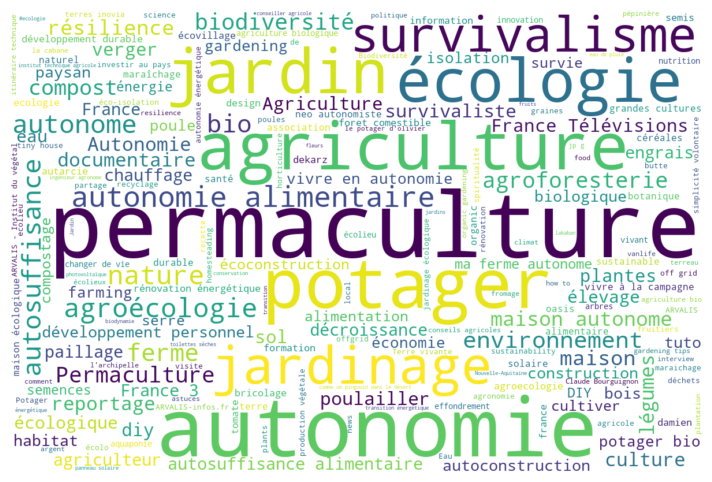

In [58]:
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Extraire toutes les tags dans une liste
all_tags = []

for video in echantillon:
    tags = video.get('tags', [])
    if isinstance(tags, list):
        all_tags.extend(tags)

# Créer un DataFrame à partir des tags
tags_df = pd.DataFrame(all_tags, columns=['tag'])

# Compter la fréquence de chaque tag
tag_counts = tags_df['tag'].value_counts()

# Créer un dictionnaire des tags et de leur fréquence pour la word cloud
tag_frequencies = tag_counts.to_dict()

# Générer le nuage de mots (word cloud)
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate_from_frequencies(tag_frequencies)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Masquer les axes
plt.show()


In [61]:
import json
import pandas as pd
from collections import Counter

# Charger les fichiers JSON
with open("../jsons/videos.json", "r", encoding="utf-8") as f:
    videos = json.load(f)

# Compteur pour les requêtes
query_counter = Counter()

# Parcourir les vidéos et compter les occurrences des requêtes
for video in videos:
    if 'requete' in video:
        for query in video['requete']:
            query_counter[query] += 1

# Trier les requêtes par fréquence décroissante
sorted_queries = sorted(query_counter.items(), key=lambda x: x[1], reverse=True)

# Créer un DataFrame avec les résultats
df = pd.DataFrame(sorted_queries, columns=["Requete", "Nombre d'Occurrences"])

# Sauvegarder le DataFrame dans un fichier Excel
df.to_excel("../xls/requetes_triees.xlsx", index=False)

print("Les requêtes ont été sauvegardées dans le fichier 'requetes_triees.xlsx'.")


Les requêtes ont été sauvegardées dans le fichier 'requetes_triees.xlsx'.


## Shorts Analyzing

In [1]:
import json

with open("../jsons/shorts.json", "r", encoding="utf-8") as file:
    shorts = json.load(file)

- Shorts With likn in the description 

In [4]:
import re

url_pattern = re.compile(r'https?://\S+')
shorts_with_links = []

for video in shorts:
    description = video.get("description", "")
    if url_pattern.search(description):
        shorts_with_links.append(video)

with open("../jsons/shorts_with_links.json", "w", encoding="utf-8") as outfile:
    json.dump(shorts_with_links, outfile, indent=2, ensure_ascii=False)

print(f"{len(shorts_with_links)} shorts")


229 shorts


In [10]:
import json
import re

with open('../jsons/shorts_with_links.json', 'r', encoding='utf-8') as file:
    shorts_with_links = json.load(file)

def extract_links(description):
    return re.findall(r'https?://\S+', description)

for video in shorts_with_links:
    links = extract_links(video['description'])
    video['links'] = links

with open('../jsons/shorts_with_links.json', 'w', encoding='utf-8') as file:
    json.dump(shorts_with_links, file, indent=4, ensure_ascii=False)

print("Les liens ont été extraits et ajoutés avec succès.")


Les liens ont été extraits et ajoutés avec succès.


In [17]:
import json
import re

with open('../jsons/shorts_with_links.json', 'r', encoding='utf-8') as file:
    shorts_with_links = json.load(file)

def contains_youtube_link(links):
    return any(re.search(r'https://youtu\.be/\S+', link) for link in links)

count_youtube_links = sum(1 for video in shorts_with_links if contains_youtube_link(video['links']))

print(f"Nombre de shorts contenant un lien vers une autre vidéo YouTube : {count_youtube_links}")


Nombre de shorts contenant un lien vers une autre vidéo YouTube : 17


- Shorts Without likn in the description 

In [19]:
import json
import re

with open('../jsons/shorts.json', 'r', encoding='utf-8') as file:
    shorts = json.load(file)

def extract_links(description):
    return re.findall(r'https?://\S+', description)

shorts_without_links = [video for video in shorts if not extract_links(video['description'])]

with open('../jsons/shorts_without_links.json', 'w', encoding='utf-8') as file:
    json.dump(shorts_without_links, file, indent=4, ensure_ascii=False)

print(f"{len(shorts_without_links)} shorts sans lien ont été extraits.")


503 shorts sans lien ont été extraits.


In [ ]:
from openai import OpenAI
client = OpenAI(
    base_url=endpoint,
    api_key=os.getenv("GITHUB_TOKEN"),
)

In [ ]:
system_prompt = """
    Vous êtes un expert en analyse de contenus YouTube Shorts. Votre tâche est de déterminer le type de chaque vidéo YouTube Short sur la thématique de l'autosuffisance, en vous basant uniquement sur le titre et la description de la vidéo. Les catégories possibles sont :\n 
        
    1. **Tutoriel** : Vidéo montrant étape par étape un processus ou une méthode liée à l'autosuffisance (par exemple, cultiver des légumes, installer un système de récupération d'eau de pluie, etc.). \n  
    2. **Vlog rapide** : Vidéo à caractère personnel ou expérimental, souvent de format informel, où le créateur partage son expérience ou ses réflexions sur l'autosuffisance. \n 
    3. **Short explicatif** : Vidéo concise qui explique un concept ou une idée clé de manière claire et didactique, souvent sans interaction personnelle.\n   
    4. **Autre** : Tout autre type de contenu qui ne correspond pas aux catégories ci-dessus. \n 

    Pour chaque vidéo, vous devez analyser le titre et la description pour faire une classification. Si vous êtes incertain, choisissez la catégorie qui semble la plus appropriée.
    
    """
try :
    response = client.chat.completions.create(
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Titres des vidéos : {titles}\nDescriptions des vidéos : {descriptions}"},
    ],
    temperature=0.7,  
    top_p=1.0,
    max_tokens=500,  
    model=model_name
    )
    return  response

except Exception as e:
    print(f"Error: {e}")
    return None